In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn


In [5]:
India_covid19 = pd.read_csv('/home/krish/Downloads/covid_19_india.csv', parse_dates=['Date'], dayfirst=True)
print(India_covid19.head())
print(India_covid19.tail())

   Sno       Date     Time State/UnionTerritory ConfirmedIndianNational  \
0  1.0 2020-01-30  6:00 PM               Kerala                       1   
1  2.0 2020-01-31  6:00 PM               Kerala                       1   
2  3.0 2020-02-01  6:00 PM               Kerala                       2   
3  4.0 2020-02-02  6:00 PM               Kerala                       3   
4  5.0 2020-02-03  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0    0.0     0.0        1.0  
1                        0    0.0     0.0        1.0  
2                        0    0.0     0.0        2.0  
3                        0    0.0     0.0        3.0  
4                        0    0.0     0.0        3.0  
     Sno Date Time State/UnionTerritory ConfirmedIndianNational  \
642  NaN  NaT  NaN                  NaN                     NaN   
643  NaN  NaT  NaN                  NaN                     NaN   
644  NaN  NaT  NaN

In [6]:


India_covid19.columns



Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [7]:
India_covid19.drop(["Sno"], axis = 1, inplace = True)
India_covid19.rename(columns = {"State/UnionTerritiry": "States"}, inplace=True)
print(India_covid19.head())
print(India_covid19.tail())

        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0 2020-01-30  6:00 PM               Kerala                       1   
1 2020-01-31  6:00 PM               Kerala                       1   
2 2020-02-01  6:00 PM               Kerala                       2   
3 2020-02-02  6:00 PM               Kerala                       3   
4 2020-02-03  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0    0.0     0.0        1.0  
1                        0    0.0     0.0        1.0  
2                        0    0.0     0.0        2.0  
3                        0    0.0     0.0        3.0  
4                        0    0.0     0.0        3.0  
    Date Time State/UnionTerritory ConfirmedIndianNational  \
642  NaT  NaN                  NaN                     NaN   
643  NaT  NaN                  NaN                     NaN   
644  NaT  NaN                  NaN                     NaN   
6

In [8]:
India_per_day = India_covid19.groupby(["Date"])["Confirmed"].sum().reset_index().sort_values("Date", ascending = True)
print(India_per_day.head())
print(India_per_day.tail())
print(India_per_day.shape)

        Date  Confirmed
0 2020-01-30        1.0
1 2020-01-31        1.0
2 2020-02-01        2.0
3 2020-02-02        3.0
4 2020-02-03        3.0
         Date  Confirmed
60 2020-03-30     1251.0
61 2020-03-31     1397.0
62 2020-04-01     1834.0
63 2020-04-02     2069.0
64 2020-04-03     2470.0
(65, 2)


In [9]:


India_per_day.shape[0]



65

In [10]:
India_per_day['Date']=pd.to_datetime(India_per_day.Date,dayfirst=True)
India_daily= India_per_day.groupby(['Date'])['Confirmed'].sum().reset_index().sort_values('Date',ascending=True)
India_daily["day_count"] = np.arange(0, India_daily.shape[0])

daily_infection = India_daily.loc[:, ["day_count", "Confirmed"]]
print(daily_infection.head())
print(daily_infection.tail())

   day_count  Confirmed
0          0        1.0
1          1        1.0
2          2        2.0
3          3        3.0
4          4        3.0
    day_count  Confirmed
60         60     1251.0
61         61     1397.0
62         62     1834.0
63         63     2069.0
64         64     2470.0


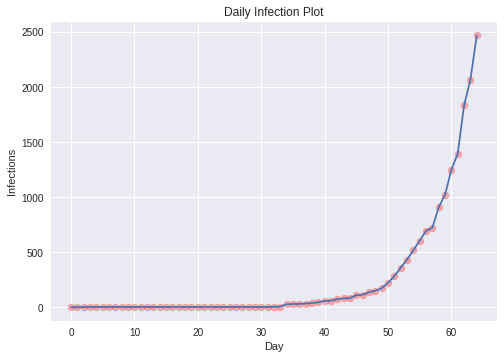

In [11]:
plt.scatter(daily_infection["day_count"], daily_infection["Confirmed"], alpha=0.3, c="red")
plt.plot(daily_infection["day_count"], daily_infection["Confirmed"])
plt.title("Daily Infection Plot")
plt.xlabel("Day")
plt.ylabel("Infections")
plt.show()

In [12]:
# Taking log of dependent variable
daily_infection["logConfirmed"] = np.log(daily_infection.Confirmed)
daily_infection.head(4)


,day_count,Confirmed,logConfirmed
0,0,1.0,0.000000
1,1,1.0,0.000000
2,2,2.0,0.693147
3,3,3.0,1.098612


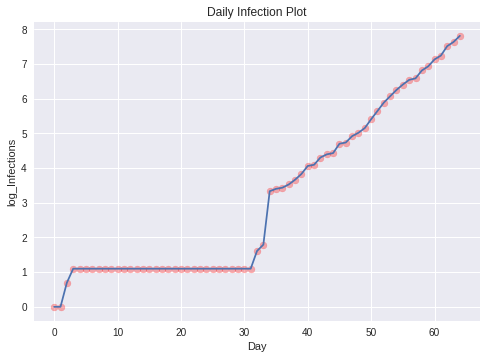

In [13]:
plt.scatter(daily_infection["day_count"], daily_infection["logConfirmed"], alpha=0.3, c="red")
plt.plot(daily_infection["day_count"], daily_infection["logConfirmed"])
plt.title("Daily Infection Plot")
plt.xlabel("Day")
plt.ylabel("log_Infections")
plt.show()

In [14]:


import statsmodels.api as sm

X = daily_infection.day_count
X = sm.add_constant(X)
y = daily_infection.logConfirmed



In [15]:


model = sm.OLS(y, X)
reg = model.fit()
print(reg.summary())



                            OLS Regression Results                            
Dep. Variable:           logConfirmed   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     483.2
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           3.01e-31
Time:                        23:14:04   Log-Likelihood:                -78.293
No. Observations:                  65   AIC:                             160.6
Df Residuals:                      63   BIC:                             164.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.6915      0.201     -3.440      0.0

In [16]:
x0 = np.exp(reg.params[0])
b = np.exp(reg.params[1])
x0, b

(0.5008239408949785, 1.1265069864307291)

In [17]:


t1 = np.arange(India_daily.shape[0])
y = (x0 + b**t1).round()
y



array([  2.00000000e+00,   2.00000000e+00,   2.00000000e+00,
         2.00000000e+00,   2.00000000e+00,   2.00000000e+00,
         3.00000000e+00,   3.00000000e+00,   3.00000000e+00,
         3.00000000e+00,   4.00000000e+00,   4.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   6.00000000e+00,
         6.00000000e+00,   7.00000000e+00,   8.00000000e+00,
         9.00000000e+00,   1.00000000e+01,   1.10000000e+01,
         1.30000000e+01,   1.40000000e+01,   1.60000000e+01,
         1.80000000e+01,   2.00000000e+01,   2.30000000e+01,
         2.50000000e+01,   2.90000000e+01,   3.20000000e+01,
         3.60000000e+01,   4.10000000e+01,   4.60000000e+01,
         5.10000000e+01,   5.80000000e+01,   6.50000000e+01,
         7.30000000e+01,   8.30000000e+01,   9.30000000e+01,
         1.05000000e+02,   1.18000000e+02,   1.33000000e+02,
         1.49000000e+02,   1.68000000e+02,   1.89000000e+02,
         2.13000000e+02,   2.40000000e+02,   2.71000000e+02,
         3.05000000e+02,

In [18]:


upto_now = pd.DataFrame({'day_count': t1, "Actual": daily_infection["Confirmed"], "Predicted": y, })
upto_now



,Actual,Predicted,day_count
0,1.0,2.0,0
1,1.0,2.0,1
2,2.0,2.0,2
3,3.0,2.0,3
4,3.0,2.0,4
5,3.0,2.0,5
6,3.0,3.0,6
7,3.0,3.0,7
8,3.0,3.0,8
9,3.0,3.0,9


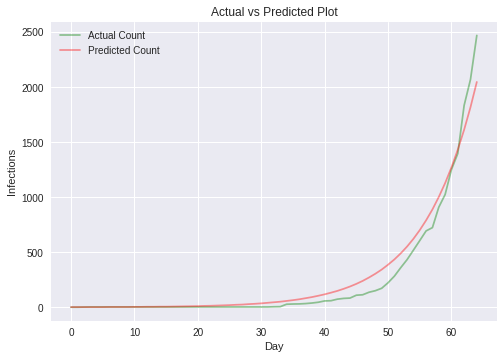

In [19]:
plt.plot(upto_now.day_count, upto_now.Actual, alpha=0.4, c="green")
plt.plot(upto_now.day_count, upto_now.Predicted, alpha=0.4, c="red")

plt.title("Actual vs Predicted Plot")
plt.legend(["Actual Count", "Predicted Count"])
plt.xlabel("Day")
plt.ylabel("Infections")
plt.show()


In [27]:
from sklearn.metrics import mean_squared_error

mean_squared_error(upto_now.Actual, upto_now.Predicted, squared=False)

TypeError: mean_squared_error() got an unexpected keyword argument 'squared'

In [28]:
India_daily.shape[0] + 14

79

In [29]:
t = np.arange(India_daily.shape[0], India_daily.shape[0] + 14)
t

array([65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78])

In [30]:
xt = (x0 + b**t).round()
xt


array([  2306.,   2597.,   2926.,   3296.,   3713.,   4182.,   4711.,
         5307.,   5979.,   6735.,   7587.,   8547.,   9628.,  10846.])

In [31]:
next2weeks = pd.DataFrame({'day_count': t, "Confirmed": xt})
next2weeks

,Confirmed,day_count
0,2306.0,65
1,2597.0,66
2,2926.0,67
3,3296.0,68
4,3713.0,69
5,4182.0,70
6,4711.0,71
7,5307.0,72
8,5979.0,73
9,6735.0,74


In [32]:
X = daily_infection.day_count
y = daily_infection.Confirmed

X1 = next2weeks.day_count
y1 = next2weeks.Confirmed

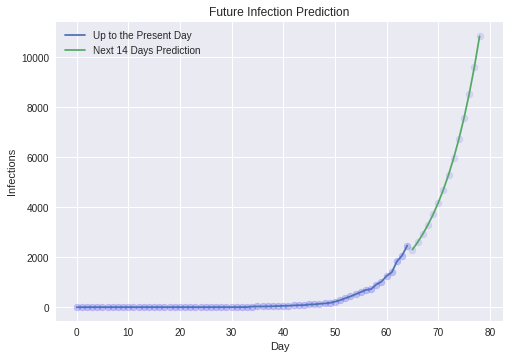

In [33]:
plt.scatter(X, y, alpha=0.2, c="blue")
plt.scatter(X1, y1, alpha=0.1, c="blue")
plt.plot(X, y)
plt.plot(X1, y1)
plt.title("Future Infection Prediction")
plt.legend(["Up to the Present Day", "Next 14 Days Prediction"])
plt.xlabel("Day")
plt.ylabel("Infections")
plt.show()